# Heart Failure Prediction

### This project seeks to analyze and predict the risk of someone suffering from a CadioVascularDisease (CVD) by analyzing various features given in the chosen dataset.

### This project work is the last of the IBM/Coursera Applied Data Science course

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Insight](#results)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5 CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. 

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Data <a name="data"></a>

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations

Hungarian: 294 observations

Switzerland: 123 observations

Long Beach VA: 200 observations

Stalog (Heart) Data Set: 270 observations

**Attribute Information**

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

## Methodology <a name="methodology"></a>

This project we will direct efforts on trying to predict the possibility of one suffering a heart attack or stroke based on certain features recorded. 

The first step of this project was to collect the necessary data from https://www.kaggle.com/fedesoriano/heart-failure-prediction?select=heart.csv

The second step will be to analyze certain features of the dataset that have been collected thus far and explore them using different EDA tools.

The third and the final step will be to use Decision Tree/ Random Forests models to make the predictions as well as test the efficacy of the model using the classifiers

## Analysis <a name="analysis"></a>

To understand the dataset, all features of the dataset will be analyzed graphically to pick some insight from the data before employing other technics to study the data.

## Insights <a name="analysis"></a>

Any insight found from the data will be written under the particular cell for easy reference. 

**Import basic libraries to start with**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [44]:
#Let's load the data into a panda dataframe

df = pd.read_csv('heart.csv')
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [45]:
#Employ Pandas DataFrame Profiling tool to explore the loaded data

import pandas_profiling as pp
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title=" DF Profiling Report")
profile

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

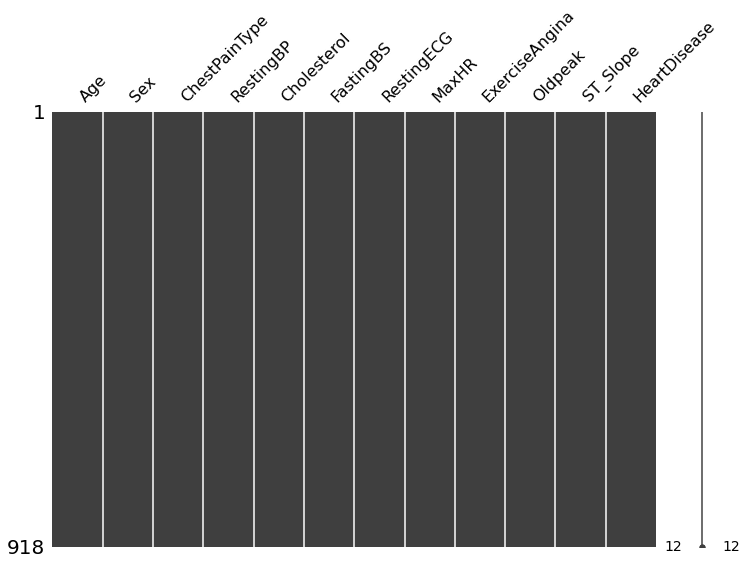

In [46]:
# Check for missing data or completeness of the data

import missingno as msno

msno.matrix(df, figsize=(12, 8))

In [47]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


In [48]:
#Check the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [49]:
#Perform basic analysis of the data
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [51]:
df.corr()

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

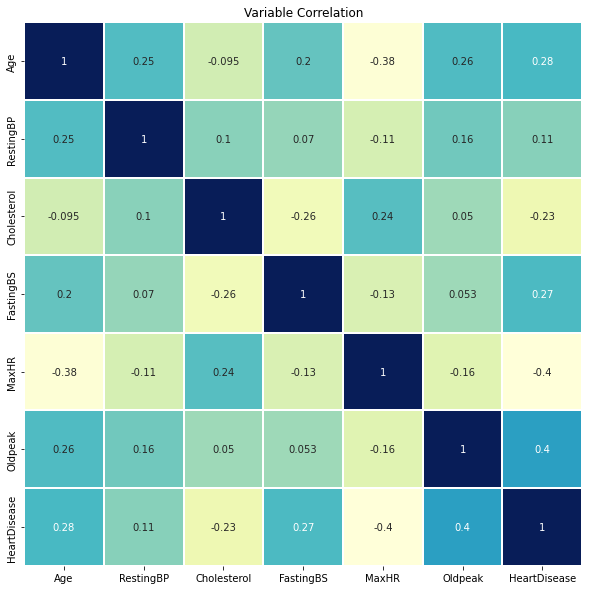

In [50]:
#Check the correlation of the features or variables

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=1, cmap='YlGnBu', annot=True, cbar=False)
plt.title('Variable Correlation')
plt.show()

In [52]:
# A Function for placing labels on charts

def clabels (ax, spacing = 5):

  
    for rect in ax.patches:
        y_vals = rect.get_height()
        x_vals = rect.get_x() + rect.get_width() / 2
        space = spacing
        alignment = 'bottom'

        if y_vals < 0:
            space *= -1
            alignment = 'top'

        label = "{:.2f}%".format(y_vals)

        plt.annotate(label,
                     (x_vals, y_vals), 
                     xytext = (0, space),
                     textcoords = "offset points",
                     ha = 'center',
                     va = alignment)

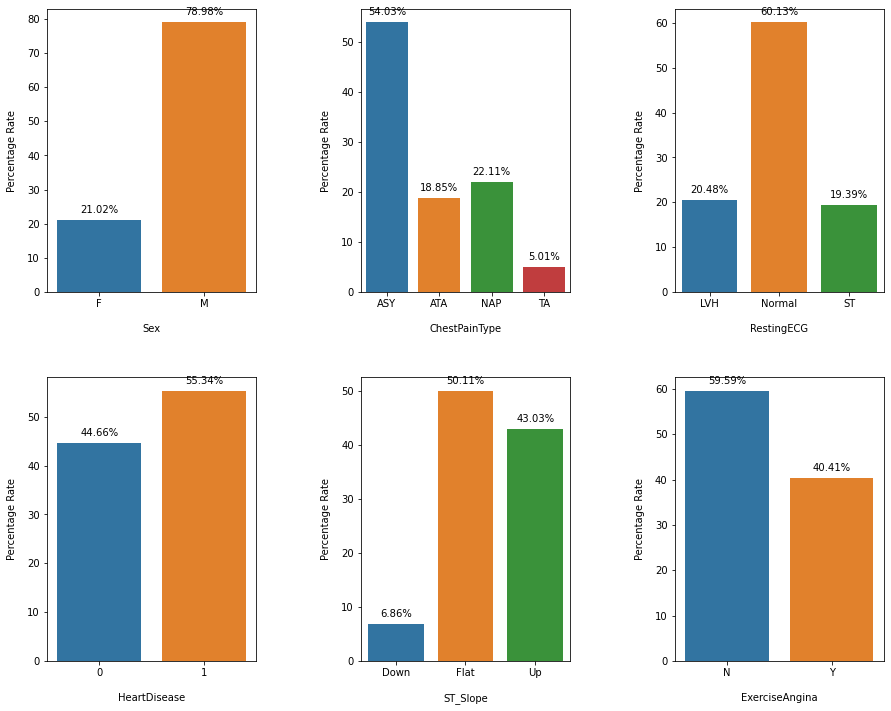

In [53]:
charts = ['Sex', 'ChestPainType', 'RestingECG', 'HeartDisease', 'ST_Slope','ExerciseAngina']
counter = 1

plt.figure(figsize = (15, 12))

for c in charts:
        
    series = round(((df[c].value_counts(dropna = False))/
                    (len(df[c])) * 100), 2)

    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(c, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 10)

    # Call Function
    clabels(ax)

    counter += 1

del charts, counter, ax

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

**Data Insight 1**

Males tend to develop various forms of chest pain than females, irrespective of age

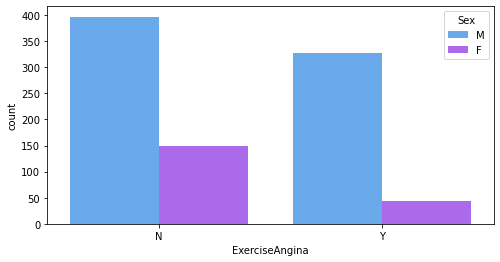

In [54]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='ExerciseAngina',hue='Sex',data=df,palette='cool')

**Data Insight 2**

Based on the data, Males generally gets Angina than females, this could however be linked physical activity, stress, or exposure to cold temperatures, or big meals.

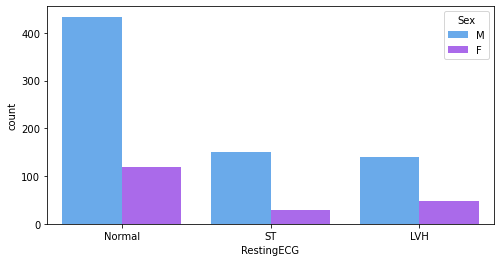

In [55]:
plt.figure(figsize=(8,4))
sns.countplot(x='RestingECG',hue='Sex',data=df,palette='cool')

**Data Insight 3**

Some significant number of females in the dataset showed probable or definite left ventricular hypertrophy than those with ST-T wave abnormality

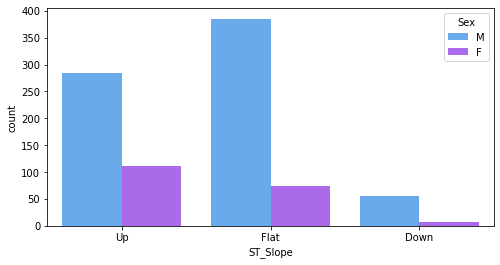

In [56]:
plt.figure(figsize=(8,4))
sns.countplot(x='ST_Slope',hue='Sex',data=df,palette='cool')

In [63]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [64]:
df[['ST_Slope','Sex']].groupby('Sex').count()

ST_Slope
Sex          
F         193
M         725

**Data Insight 4**

Some significant number of females in the dataset showed probable or definite left ventricular hypertrophy than those with ST-T wave abnormality

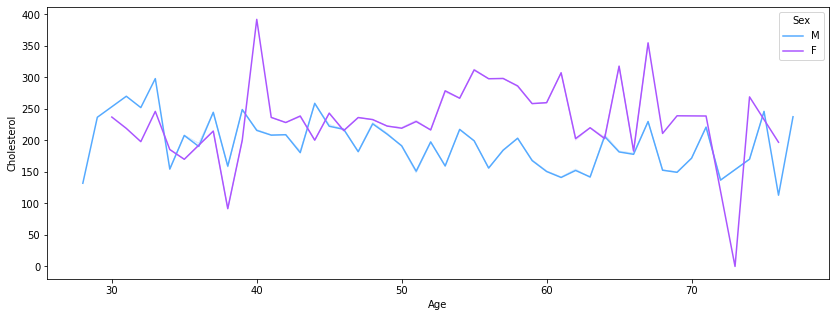

In [58]:
plt.figure(figsize=(14,5))
sns.lineplot(x='Age',y='Cholesterol', hue='Sex', data=df,palette='cool',ci=0)

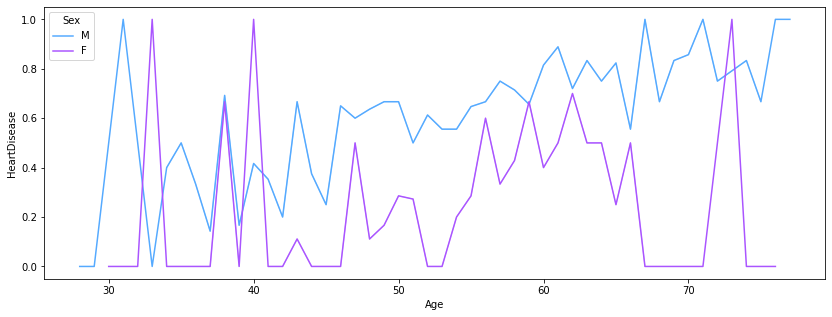

In [59]:
plt.figure(figsize=(14,5))
sns.lineplot(x='Age',y='HeartDisease', hue='Sex', data=df,palette='cool',ci=0)

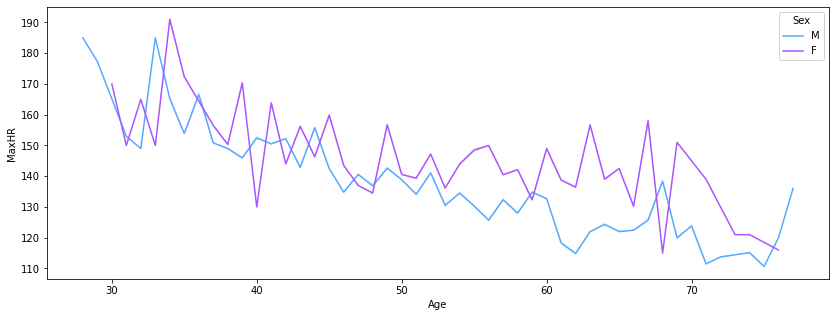

In [60]:
plt.figure(figsize=(14,5))
sns.lineplot(x='Age',y='MaxHR', hue='Sex', data=df,palette='cool',ci=0)

In [65]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

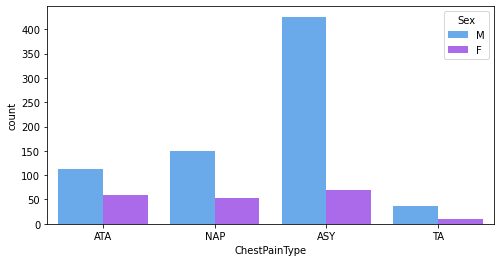

In [67]:
plt.figure(figsize=(8,4))
sns.countplot(x='ChestPainType',hue='Sex',data=df,palette='cool')

#for x, label in zip(ax.patches, df['ChestPainType'].value_counts().index):
#    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))


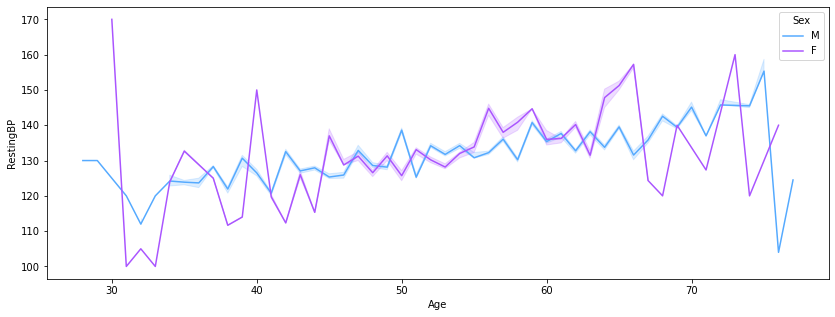

In [68]:
plt.figure(figsize=(14,5))
sns.lineplot(x='Age',y='RestingBP', hue='Sex', data=df,palette='cool',ci=15)

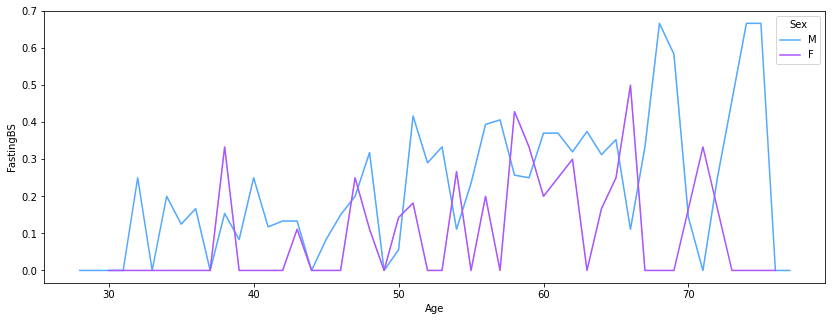

In [69]:
plt.figure(figsize=(14,5))
sns.lineplot(x='Age',y='FastingBS', hue='Sex', data=df,palette='cool',ci=0)

In [70]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [71]:
# Map the values of the Sex column into binary

df['Sex'] = df['Sex'].map({'M': 0,'F': 1})

**Data Insight**


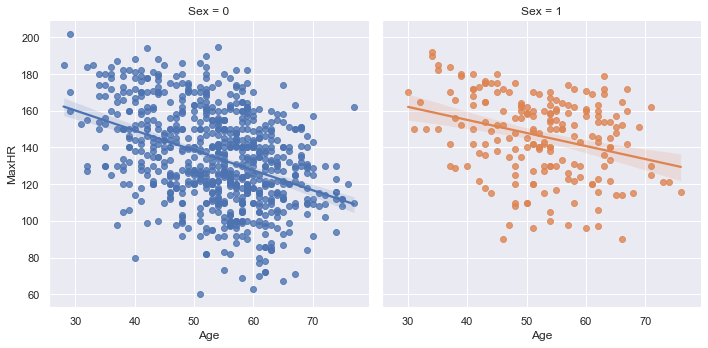

In [72]:
sns.set_theme(style="darkgrid")

# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

# Show the survival probability as a function of age and sex
g = sns.lmplot(x='Age', y='MaxHR', col='Sex', hue='Sex', data=df)

In [73]:
df.head()

Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0   40    0           ATA        140          289          0     Normal   
1   49    1           NAP        160          180          0     Normal   
2   37    0           ATA        130          283          0         ST   
3   48    1           ASY        138          214          0     Normal   
4   54    0           NAP        150          195          0     Normal   

   MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172              N      0.0       Up             0  
1    156              N      1.0     Flat             1  
2     98              N      0.0       Up             0  
3    108              Y      1.5     Flat             1  
4    122              N      0.0       Up             0

In [74]:
#Group ages into bracket

def age_buckets(x): 
    if x < 30: return '20-29' 
    elif x < 40: return '30-39' 
    elif x < 50: return '40-49' 
    elif x < 60: return '50-59' 
    elif x < 70: return '60-69' 
    elif x >=70: return '70+' 
    else: return 'other'

In [75]:
#Change Resting ECG from categorical values to digits for model training

def restingecg (x): 
    if x == 'Normal': return 0
    elif x == 'LVH': return 1 
    elif x == 'ST': return 2 


In [76]:
#Change CHEST PAIN TYPE from categorical values to digits for model training

def chestpain (x): 
    if x == 'ASY': return 0
    elif x == 'NAP': return 1 
    elif x == 'ATA': return 2
    elif x == 'TA': return 3 

In [77]:
#Change Excercise Angina from categorical values to boolean for model training

def ex_angina (x): 
    if x == 'Y': return 0
    elif x == 'N': return 1 
    

In [78]:
#Change ST_Slope from categorical values to boolean for model training

def st_slope (x): 
    if x == 'Flat': return 0
    elif x == 'Up': return 1 
    elif x == 'Down': return 2
    

In [79]:
#df = df.drop('ChestPain',axis=1)

In [80]:
# Call functions
df['Age_Group'] = df.Age.apply(age_buckets)
df['Resting_ECG'] = df.RestingECG.apply(restingecg)
df['Chest_Pain'] = df.ChestPainType.apply(chestpain)
df['Ex_Angina'] = df.ExerciseAngina.apply(ex_angina)
df['STSlope'] = df.ST_Slope.apply(st_slope)

In [81]:
df.head()

Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0   40    0           ATA        140          289          0     Normal   
1   49    1           NAP        160          180          0     Normal   
2   37    0           ATA        130          283          0         ST   
3   48    1           ASY        138          214          0     Normal   
4   54    0           NAP        150          195          0     Normal   

   MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease Age_Group  \
0    172              N      0.0       Up             0     40-49   
1    156              N      1.0     Flat             1     40-49   
2     98              N      0.0       Up             0     30-39   
3    108              Y      1.5     Flat             1     40-49   
4    122              N      0.0       Up             0     50-59   

   Resting_ECG  Chest_Pain  Ex_Angina  STSlope  
0            0           2          1        1  
1            0           1          1        0  
2            2           2          1        1  
3            0           0          0        0  
4            0           1          1        1

In [82]:
df = df.drop(['ChestPainType','RestingECG','ExerciseAngina','ST_Slope','Age_Group'], axis=1)

In [83]:
df.head()

Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40    0        140          289          0    172      0.0             0   
1   49    1        160          180          0    156      1.0             1   
2   37    0        130          283          0     98      0.0             0   
3   48    1        138          214          0    108      1.5             1   
4   54    0        150          195          0    122      0.0             0   

   Resting_ECG  Chest_Pain  Ex_Angina  STSlope  
0            0           2          1        1  
1            0           1          1        0  
2            2           2          1        1  
3            0           0          0        0  
4            0           1          1        1

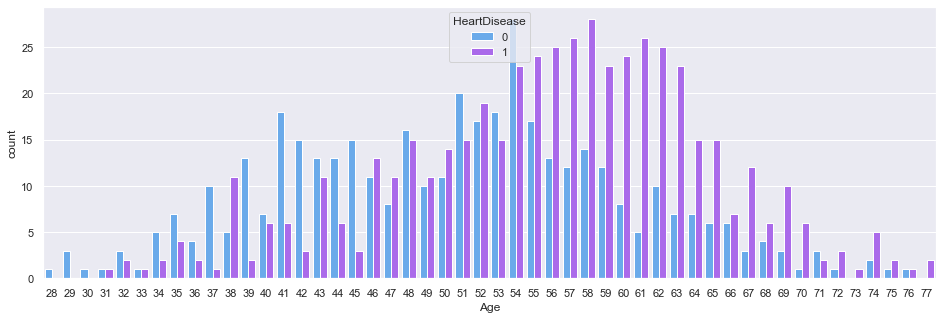

In [84]:
plt.figure(figsize=(16,5))

sns.countplot(x='Age', hue='HeartDisease', data=df.sort_values(by='Age'), palette='cool')

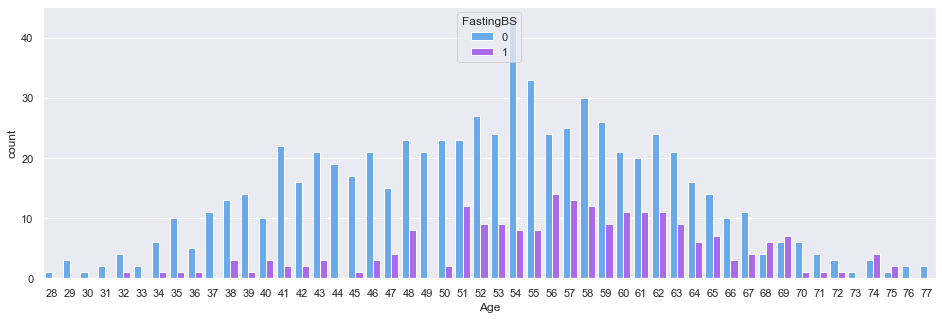

In [85]:
plt.figure(figsize=(16,5))

sns.countplot(x='Age', hue='FastingBS', data=df.sort_values(by='Age'), palette='cool')

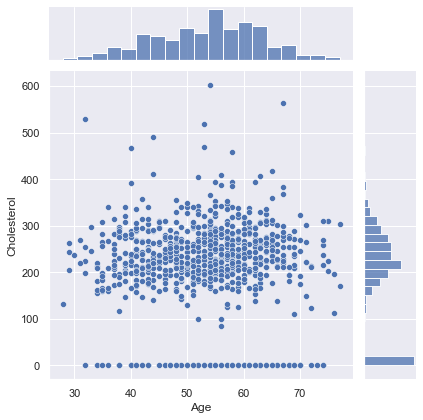

In [86]:
sns.jointplot(x='Age',y='Cholesterol',data=df,palette='cool')

**Imports of all models that will be required to train the decision tree model for the prediction as well as evaluation models**

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

**Train Test Split**

In [88]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

**Create an instance for the decision tree model**

In [89]:
dtree = DecisionTreeClassifier()

In [90]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Predictions and the evaluation of the Decision Tree model
**Create predictions from the test set**

In [91]:
predictions = dtree.predict(X_test)

In [92]:
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve, classification_report
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score, matthews_corrcoef

**Create Classification Report**

In [93]:
#Custom Function to get Scores and plots... (This is code snippet from a similar project)
def Generate_Model_Test_Classification_Report(model, X_test, y_test, model_name=""):

    '''
    Purpose: 
        Generate the consolidated test classification report. 
        The report consists of the following classification results & metrics -
            1. Confusion Matrix
            2. Classification Report
            3. F1 Score
            4. Accuracy
            5. Mathews Correlation Coefficient (MCC)
            6. Precision
            7. Recall
            8. AUROC Score - Area Under the Receiver Operating Characteristic Curve
            9. AUC-PR Score - Area Under the Precision Recall Curve.
            10. AUROC Curve - Area Under the Receiver Operating Characteristic Curve
            11. AUC-PR Curve - Area Under the Precision Recall Curve.

    Parameters:
        1. y_test - The Ground Truth for each test image.
        2. y_pred - The Predicted label for each image.
        3. model_name - Model Name

    Return Value: 
        NONE.
    '''

    # Report Title & Classification Mterics Abbreviations...
    fig, axes = plt.subplots(3, 1, figsize = (8, 3))
    axes[0].text(9, 1.8, "Consolidated Model Test Report", fontsize=30, horizontalalignment='center', 
                 color='DarkBlue', weight = 'bold')

    axes[0].axis([0, 10, 0, 10])
    axes[0].axis('off')

    axes[1].text(9, 4, "Model Name: " + model_name, style='italic', 
                         fontsize=18, horizontalalignment='center', color='DarkOrange', weight = 'bold')

    axes[1].axis([0, 10, 0, 10])
    axes[1].axis('off')

    axes[2].text(0, 4, "* 1 - No Heart Disease\t\t\t\t\t\t\t * 0 - Heart Disease\n".expandtabs() +
                 "* MCC - Matthews Correlation Coefficient\t\t* AUC - Area Under The Curve\n".expandtabs() +
                 "* ROC - Receiver Operating Characteristics     " + 
                 "\t* AUROC - Area Under the Receiver Operating    Characteristics".expandtabs(), 
                 style='italic', fontsize=10, horizontalalignment='left', color='orangered')

    axes[2].axis([0, 10, 0, 10])
    axes[2].axis('off')

    scores = []
    metrics = ['F1       ', 'MCC      ', 'Precision', 'Recall   ', 'Accuracy ',
               'AUC_ROC  ', 'AUC_PR   ']

    # Plot ROC and PR curves using all models and test data...
    y_pred = model.predict(X_test.values)
    y_pred_probs = model.predict_proba(X_test.values)[:, 1:]

    fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred)
    precision, recall, th = precision_recall_curve(y_test.values.ravel(), y_pred_probs)

    # Calculate the individual classification metic scores...
    model_f1_score = f1_score(y_test, y_pred)
    model_matthews_corrcoef_score = matthews_corrcoef(y_test, y_pred)
    model_precision_score = precision_score(y_test, y_pred)
    model_recall_score = recall_score(y_test, y_pred)
    model_accuracy_score = accuracy_score(y_test, y_pred)
    model_auc_roc = auc(fpr, tpr)
    model_auc_pr = auc(recall, precision)

    scores.append([model_f1_score,
                   model_matthews_corrcoef_score,
                   model_precision_score,
                   model_recall_score,
                   model_accuracy_score,
                   model_auc_roc,
                   model_auc_pr])

    sampling_results = pd.DataFrame(columns = ['Classification Metric', 'Score Value'])
    for i in range(len(scores[0])):
        sampling_results.loc[i] = [metrics[i], scores[0][i]]

    sampling_results.index = np.arange(1, len(sampling_results) + 1)

    class_report = classification_report(y_test, y_pred)
    conf_matx = confusion_matrix(y_test, y_pred)

    # Display the Confusion Matrix...
    fig, axes = plt.subplots(1, 3, figsize = (20, 4))
    sns.heatmap(conf_matx, annot=True, annot_kws={"size": 16},fmt='g', cbar=False, cmap="GnBu", ax=axes[0])
    axes[0].set_title("1. Confusion Matrix", fontsize=21, color='darkgreen', weight = 'bold', 
                      style='italic', loc='left', y=0.80)

    # Classification Metrics
    axes[1].text(5, 1.8, sampling_results.to_string(float_format='{:,.4f}'.format, index=False), style='italic', 
                 fontsize=20, horizontalalignment='center')
    axes[1].axis([0, 10, 0, 10])
    axes[1].axis('off')
    axes[1].set_title("2. Classification Metrics", fontsize=20, color='darkgreen', weight = 'bold', 
                      style='italic', loc='center', y=0.80)

    # Classification Report
    axes[2].text(0, 1, class_report, style='italic', fontsize=20)
    axes[2].axis([0, 10, 0, 10])
    axes[2].axis('off')
    axes[2].set_title("3. Classification Report", fontsize=20, color='darkgreen', weight = 'bold', 
                      style='italic', loc='center', y=0.80)

    plt.tight_layout()
    plt.show()

    # AUC-ROC & Precision-Recall Curve
    fig, axes = plt.subplots(1, 2, figsize = (14, 4))

    axes[0].plot(fpr, tpr, label = f"auc_roc = {model_auc_roc:.3f}")
    axes[1].plot(recall, precision, label = f"auc_pr = {model_auc_pr:.3f}")

    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].legend(loc = "lower right")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("4. AUC - ROC Curve", fontsize=15, color='darkgreen', ha='right', weight = 'bold', 
                      style='italic', loc='center', pad=1, y=1.05)

    axes[1].legend(loc = "lower left")
    axes[1].set_xlabel("Recall")
    axes[1].set_ylabel("Precision")
    axes[1].set_title("5. Precision - Recall Curve", fontsize=15, color='darkgreen', ha='right', weight = 'bold', 
                      style='italic', loc='center', pad=3, y=1.05)

    plt.subplots_adjust(top=0.95) 
    plt.tight_layout()
    plt.show()
    
##########################################################################################################################
    
def plot_model_feature_importances(model):
    '''
    Custom function to plot the 
    feature importances of the classifier.
    '''
    fig = plt.figure()
    
    # get the feature importance of the classifier 'model'
    feature_importances = pd.Series(model.feature_importances_,
                            index = X_train.columns) \
                    .sort_values(ascending=False)
    
    # plot the bar chart
    sns.barplot(x = feature_importances, y = X_train.columns)
    plt.title('Classifier Feature Importance', fontdict = {'fontsize' : 20})
    plt.xticks(rotation = 60)
    plt.show()

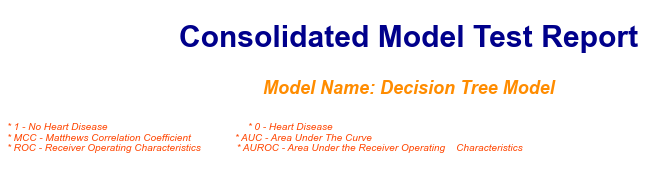

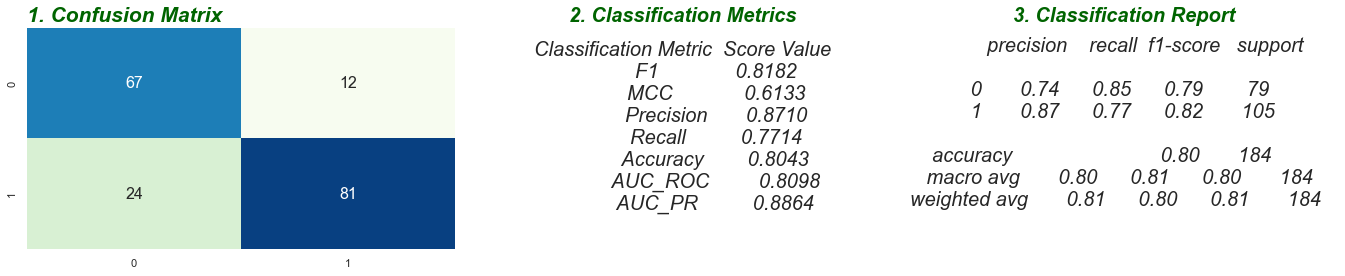

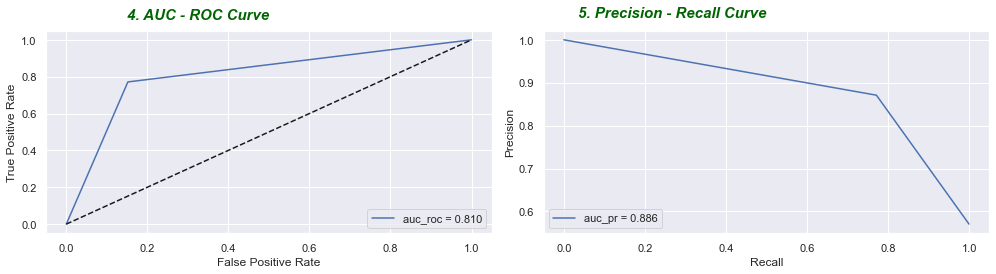

In [94]:
# Generate the model test classification report
Generate_Model_Test_Classification_Report(dtree, X_test, y_test, model_name="Decision Tree Model")

In [95]:
#confirming the above

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        79
           1       0.87      0.77      0.82       105

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184



**Create Confusion Matrix Report**

In [96]:
print(confusion_matrix(y_test,predictions))

[[67 12]
 [24 81]]


### Decision Tree Visualization

In [97]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Sex',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease',
 'Resting_ECG',
 'Chest_Pain',
 'Ex_Angina',
 'STSlope']

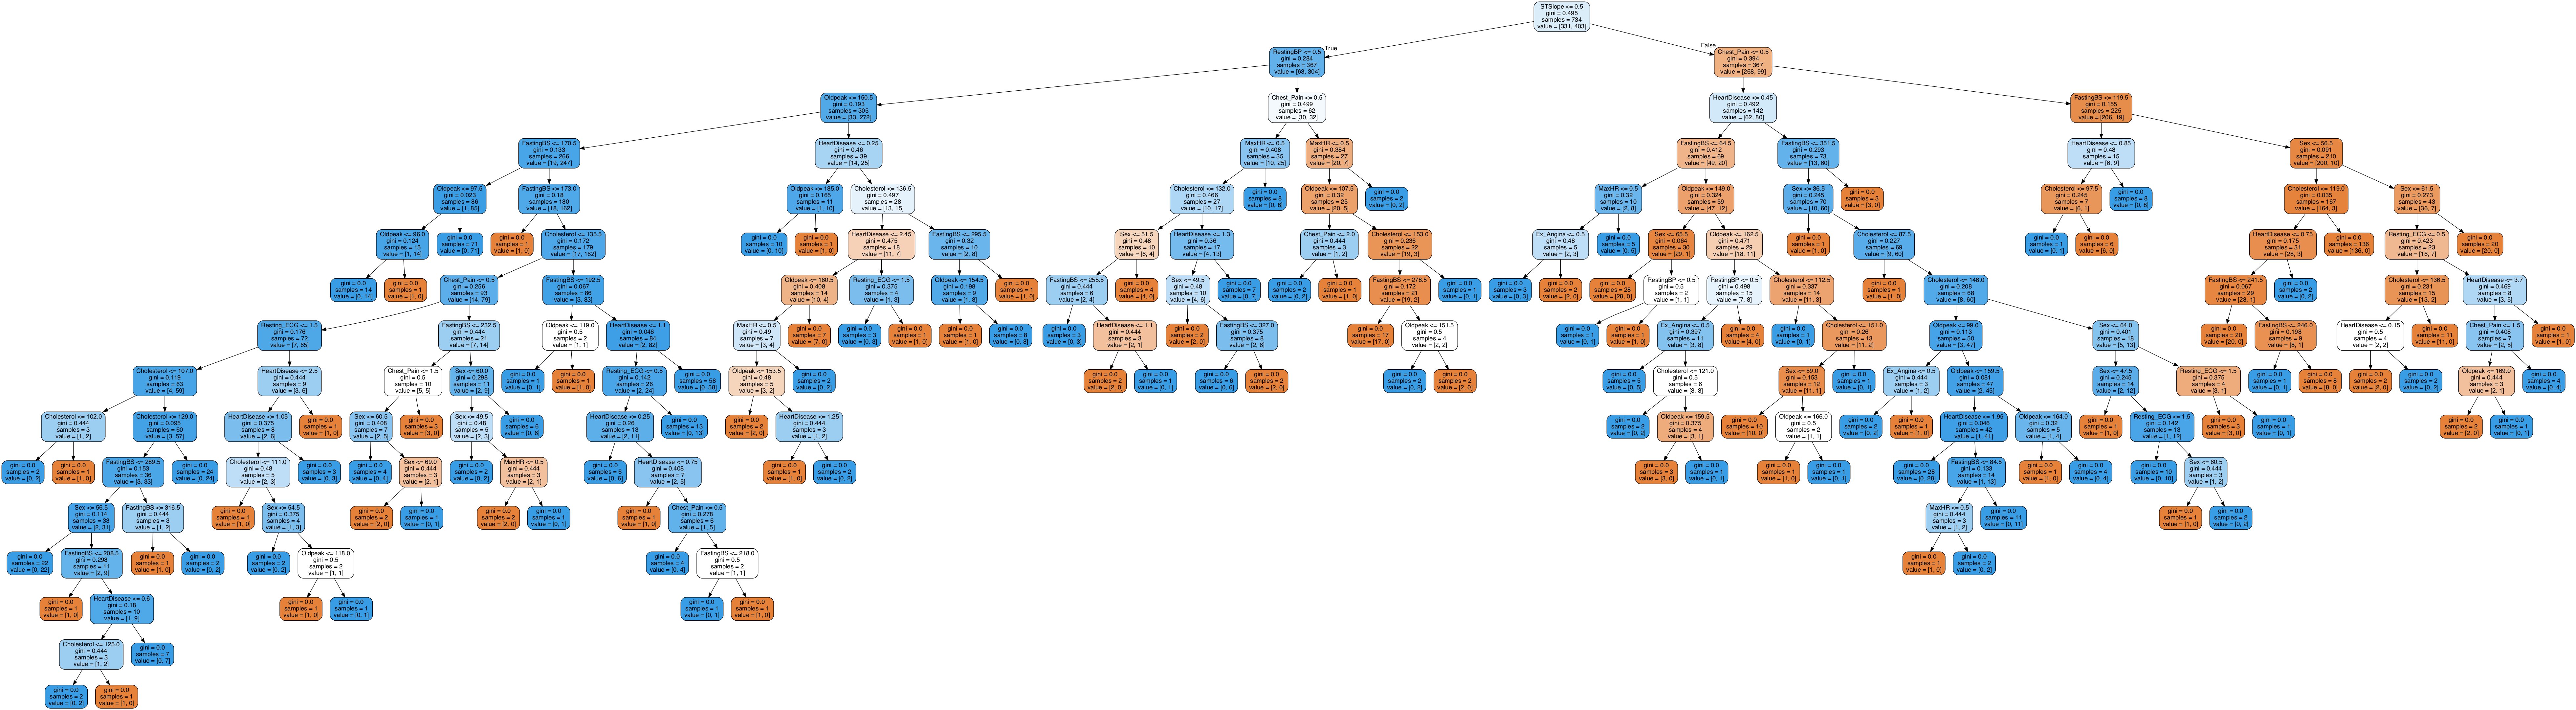

In [98]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

## Random Forests

Comparing the decision tree model to a random forest model

In [99]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [100]:
rfc_pred = rfc.predict(X_test)

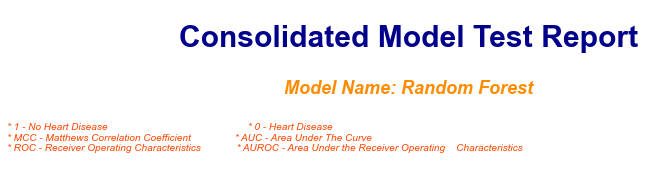

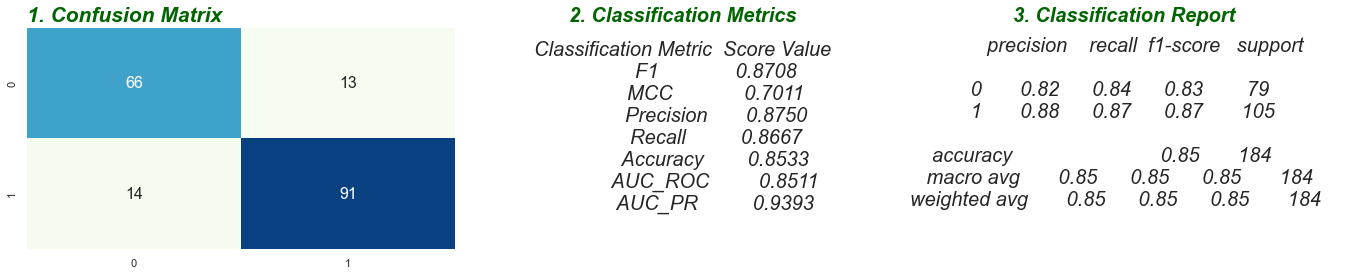

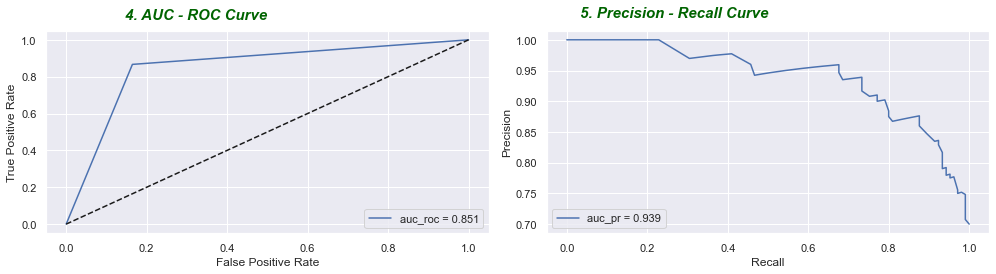

In [101]:
# Random Forest with Default Parameters
rfc = RandomForestClassifier(n_jobs = -1, random_state = 100)

rfc = rfc.fit(X_train.values, y_train.values.ravel())

# Generate the model test classification report
Generate_Model_Test_Classification_Report(rfc, X_test, y_test, model_name="Random Forest")

In [102]:
from sklearn.svm import SVC

In [103]:
svc_model = SVC()

In [104]:
svc_model.fit(X_train,y_train)

SVC()

In [105]:
prediction = svc_model.predict(X_test)

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
#Dictionary of param_grid parameters for C and gamma

param_grid = {'C': [0.1,1, 11, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [108]:
#Create a GridSearchCV object and fit it to the training data
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 11, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [109]:
grid.best_params_

{'C': 11, 'gamma': 0.001}

In [110]:
grid.best_estimator_

SVC(C=11, gamma=0.001)

In [111]:
grid_predictions = grid.predict(X_test)

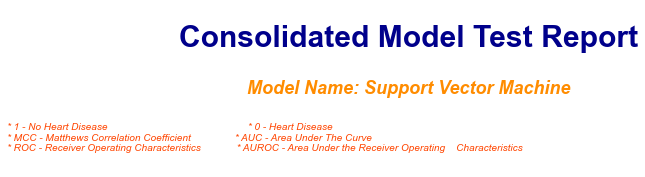

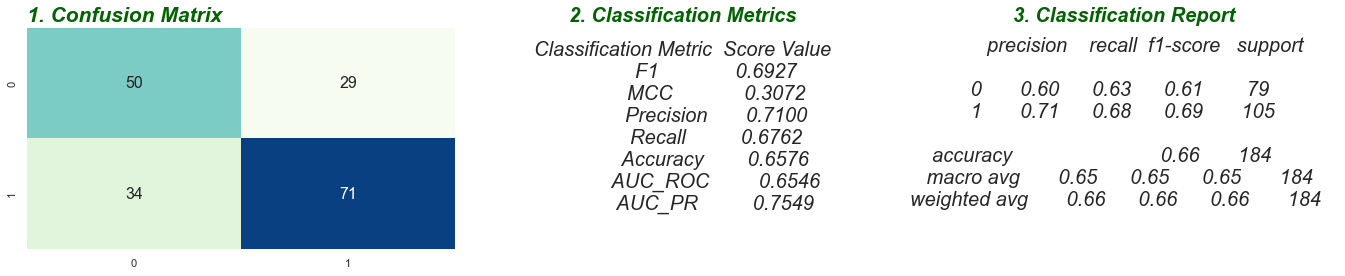

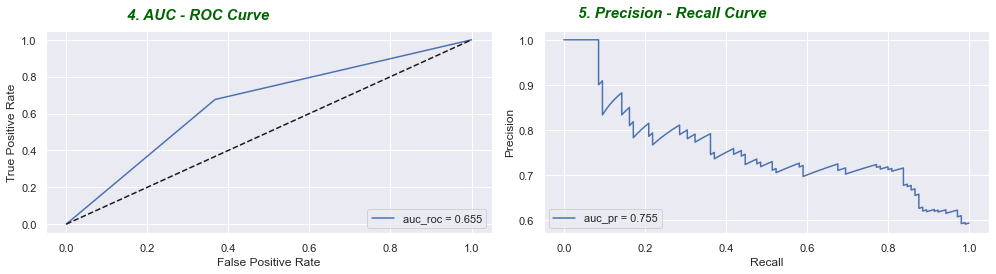

In [112]:
# Support Vector Machine report

svc_model = SVC(kernel = 'rbf', probability = True, random_state = 100)

svc_model = svc_model.fit(X_train.values, y_train.values.ravel())


# Generate the model test classification report
Generate_Model_Test_Classification_Report(svc_model, X_test, y_test, model_name="Support Vector Machine")

## The End <a name="analysis"></a>